Report from an initial data examination
==============================

Two main recommendations:

+ **Consider focusing resources on some locations**
+ **Let's work together on data quality to ensure relevant action**




In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

total_police_df = pd.read_csv("total_police_df.csv")

final_df = pd.read_csv("final_df.csv")

In [27]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+1, point['y']-0.8, str(point['val']), size=18)
        
def distance_and_incidents_graph():
    
    fig, ax = plt.subplots(1,1, figsize=( 24, 10))

    sns.scatterplot(x="DIST_TO_POLICE_STATION", y="INCIDENT_NUMBER", 
                    hue="Two most frequent types of incidents", 
                    data=total_police_df, s=1000)
    plt.legend(prop={'size': 20})

    ax.set_xlabel("How far from the police station do the incidents take place? (Average Haversine distance, km)", 
                  size=20, labelpad=20, weight='bold')
    ax.set_ylabel("How many incidents have happened? (total)", 
                  size=20, labelpad=20, weight='bold')
    ax.tick_params(which='major', labelsize=14)
    
    plt.title("Number of incidents and their average distance to police station", size=36, pad=40, weight='bold')

    label_point(total_police_df.DIST_TO_POLICE_STATION, total_police_df.INCIDENT_NUMBER, total_police_df.District, plt.gca())

    plt.show()
    
    pass

### Current situation 
+ From the 12 districts studied, 11 see the most incidents in the category "Larceny and Vandalism".</sup>
+ Districts where incidents happen farther away from the police station (Charlestown, South Boston...) don't have more incidents taking place
+ Looking at data as shared by Mayor's office, some incidents seem double-counted: on an initial dataset of length 237221, we estimate that 11337 are duplicates, i.e. 4.78 % 
+ The incidents are typically looked at in aggregate since beginning of data collection

### Current situation: illustration


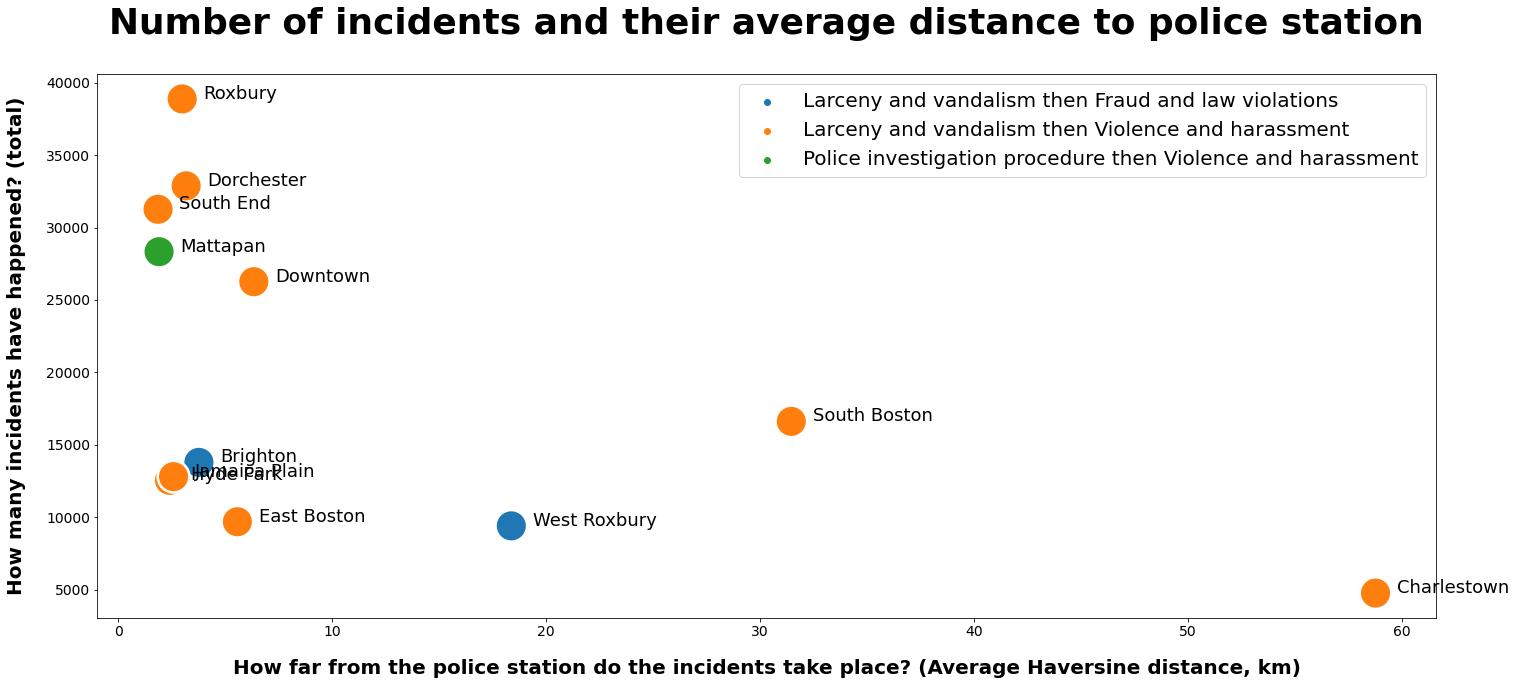

In [28]:
distance_and_incidents_graph()

In [23]:
#**Top 5 by percentage of "Violence and harassment" on all categories of incidents**
#Not used (space problem!)

final_df.sort_values(by='PERCENT_VIOLENCE', ascending=False).iloc[:5,]

,Unnamed: 0,District,INCIDENT_NUMBER,NUM_VIOLENCE,PERCENT_VIOLENCE
8,8,Roxbury,38877,5495,0.141343
7,7,Mattapan,28331,3910,0.138011
4,4,East Boston,9691,1309,0.135074
3,3,Downtown,26260,3497,0.133168
5,5,Hyde Park,12551,1559,0.124213


Recommendation n° 1
# Focusing resources on some locations

+ While the police stations are close to where most incidents happen, some additional information is worth collecting:
    + How many police(wo)men by inhabitants are there in the various stations? Maybe some districts are understaffed
    + What is the typical tenure at the most incident-prone districts? Maybe the most experienced police(wo)men avoid them
    + What is the typical distance from nearest available police(wo)men to incident? 
+ Depending on the answers to those questions, it might be worth considering staffing more some districts or reorganizing the circulation of police cars


Recommendation n° 2:
# Let's work together on data quality to ensure relevant action

+ It is possible that incidents are curently surestimated (duplicates). Let's ensure there are no duplicates in incident reporting
+ Let's systematically look at the number of incidents over the course of a year or a month, and not since the beginning of data collection: this will ensure we can detect trends and focus efforts on those districts that *currently* need it the most
+ Let's use map-based data exploration to better understand the dynamics of incidents versus police forces location 
